The complete explanation for this notebook is available at https://youranalystbuddy.com/regression-decision-tree/

# Decision tree for regression

In this notebook, we go through decision trees for regression. We will focus on demonstrations of how such tree models work and observe several examples illustrating splits in regression trees.

## One-Dimensional Examples

### Linear example

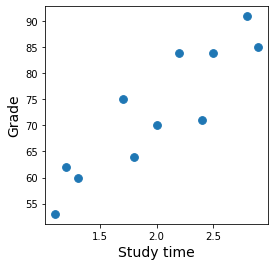

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

study_time = np.array([1.2,1.3,1.7,1.1,2.9,2.5,2.8,2.4,1.8,2.2,2.0])
grades = np.array([62,60,75,53,85,84,91,71,64,84,70])

#and visualize them
#colors will represent the two classes in this case
plt.figure(figsize=(4,4))
plt.scatter(study_time, grades, s=60)
plt.xlabel('Study time', fontsize=14)
plt.ylabel('Grade', fontsize=14)
plt.show()

#### Fully-grown tree

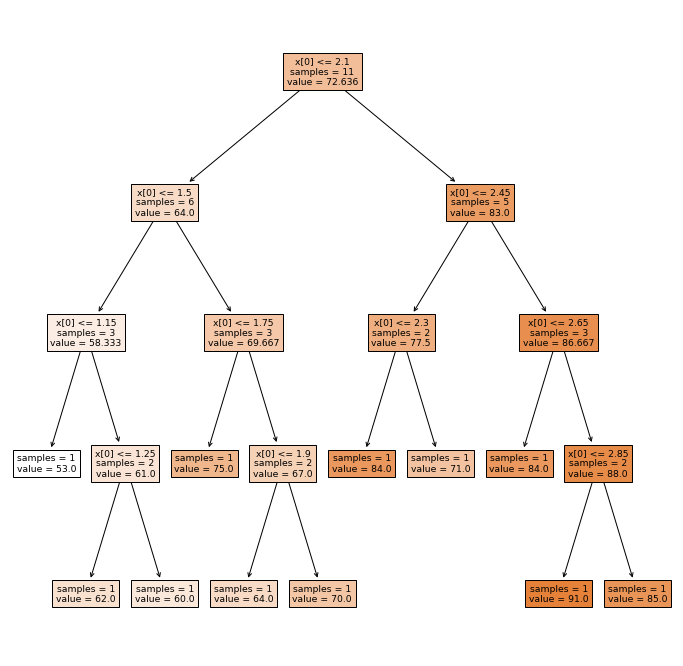

In [2]:
from sklearn.tree import DecisionTreeRegressor

#now fit a decision tree without any controls
dt = DecisionTreeRegressor()
dt.fit(study_time.reshape(-1,1), grades)

#we use the plot_tree() function from sklearn.tree to draw the tree's structure
from sklearn.tree import plot_tree

#the function takes input as a trained decision tree
plt.figure(figsize=(12,12))
plot_tree(dt, impurity=False, filled=True)
plt.show()

#### Functions to extract split values and plot a tree's predictions and splits

In [3]:
def extract_splits(tree):
    from sklearn.tree import export_text
    tree_text = export_text(dt)
    tree_text.split('\n')
    splits = [float(t.split(' ')[-1]) for t in tree_text.split('\n') if '<=' in t]
    splits.sort()
    return splits

def plot_reg_tree_decision(tree, x, y, pred_in_front=False):
    plt.figure(figsize = (5,5))

    x_points = np.linspace(x.min()-0.05, x.max()+0.05, 400)
    yp_points = dt.predict(x_points.reshape(-1,1))
    
    plt.plot(x_points, yp_points, linewidth=3, color='darkorange', zorder=10+pred_in_front*100, label='predicted')

    plt.scatter(x, y, s=60,zorder=100, label='data')

    splits = extract_splits(dt)
    splits = [x_points.min()] + splits + [x_points.max()]
    colors = sn.color_palette("pastel", len(splits))

    for i, c in zip(range(len(splits[:-1])), colors):
        plt.axvspan(splits[i], splits[i+1], alpha=0.5, facecolor=c)

    plt.legend(fontsize=12, loc='lower right')
    plt.show()

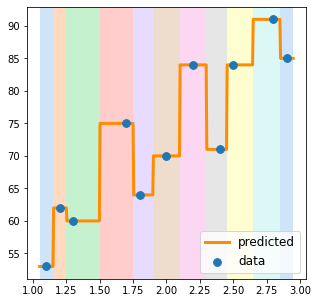

In [4]:
# drawing the tree's prediction and splits 
plot_reg_tree_decision(dt, study_time, grades)

#### Tree with max_depth = 3

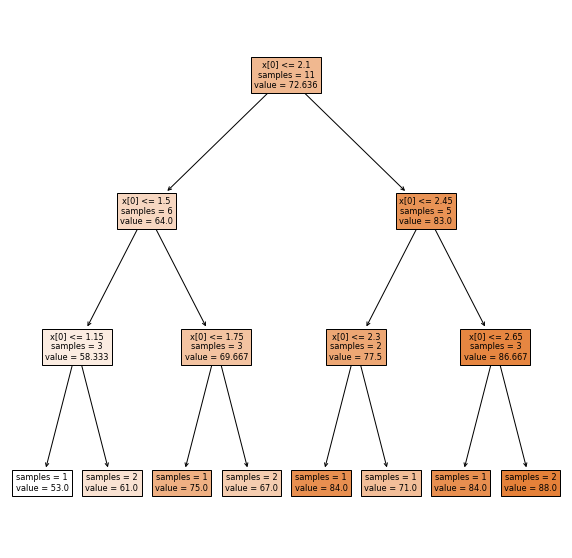

In [5]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(study_time.reshape(-1,1), grades)

plt.figure(figsize=(10,10))
plot_tree(dt, impurity=False, filled=True)
plt.show()

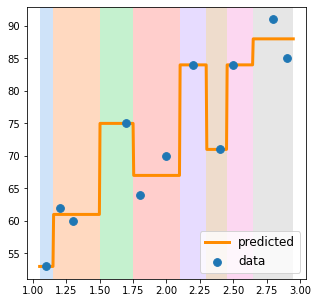

In [6]:
plot_reg_tree_decision(dt, study_time, grades)

#### Tree with max_depth = 2

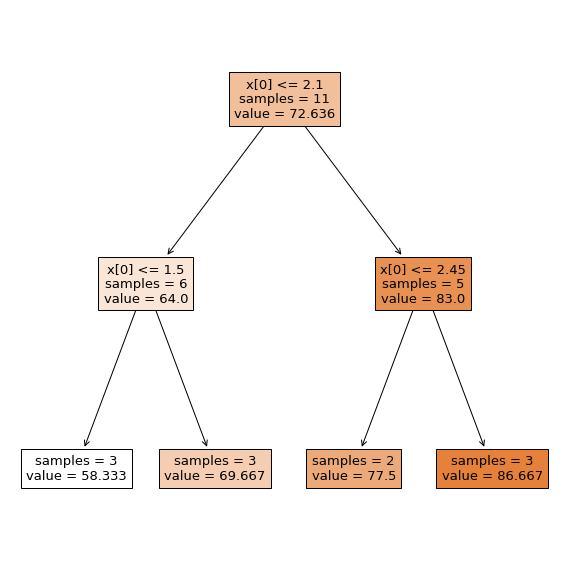

In [7]:
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(study_time.reshape(-1,1), grades)

plt.figure(figsize=(8,8))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

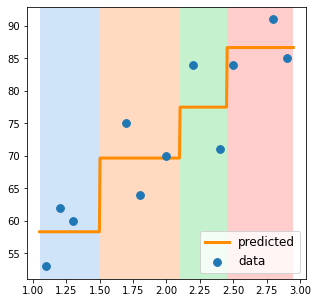

In [8]:
plot_reg_tree_decision(dt, study_time, grades)

#### Tree with max_depth = 1

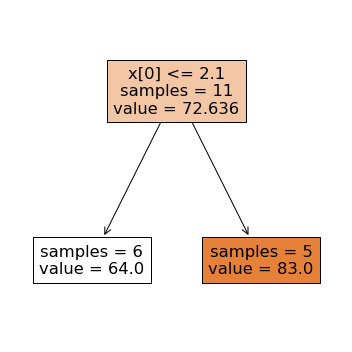

In [9]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(study_time.reshape(-1,1), grades)

plt.figure(figsize=(5,5))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

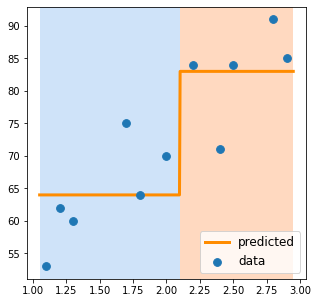

In [10]:
plot_reg_tree_decision(dt, study_time, grades)

### Nonlinear example

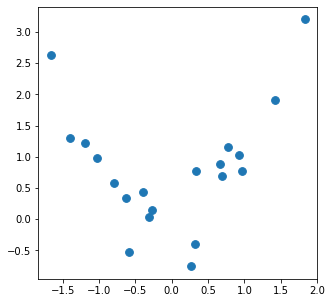

In [11]:
np.random.seed(312)
X = np.random.normal(0,1,20)
Y = X**2 + np.random.normal(0,0.4,20)

plt.figure(figsize=(5,5))
plt.scatter(X,Y,s=60)
plt.show()

#### Fully-grown tree

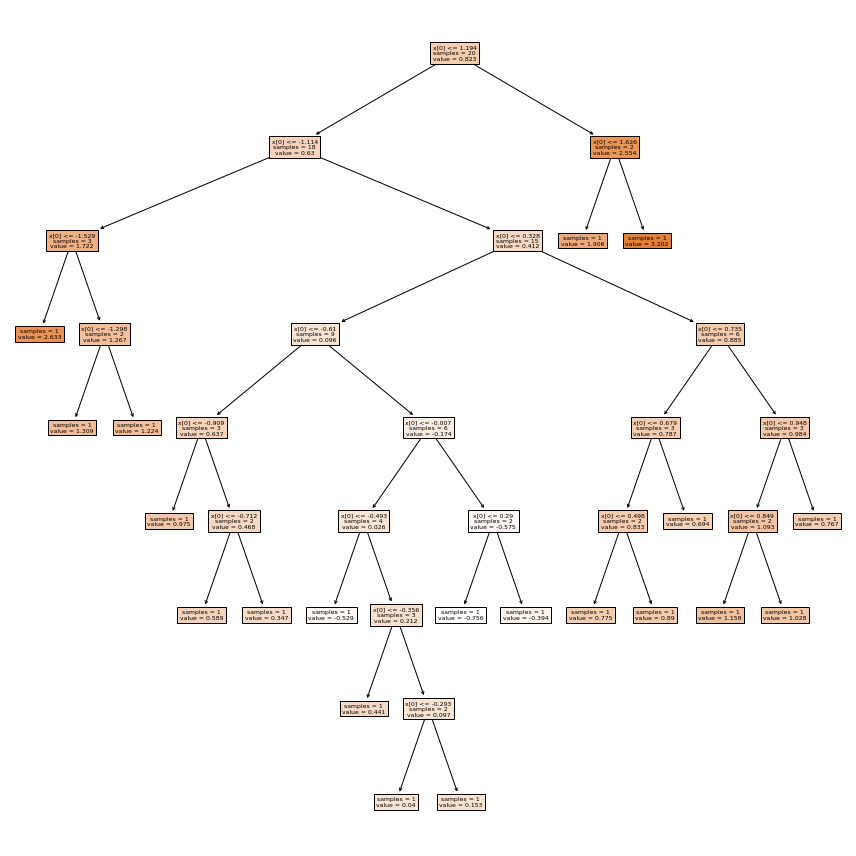

In [12]:
dt = DecisionTreeRegressor()
dt.fit(X.reshape(-1,1), Y)
plt.figure(figsize=(12,12))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

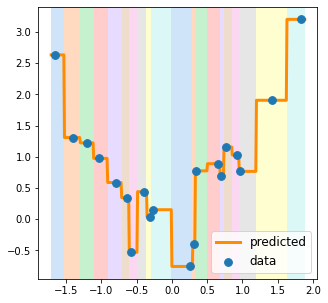

In [13]:
plot_reg_tree_decision(dt, X, Y)

#### Tree with max_depth = 3

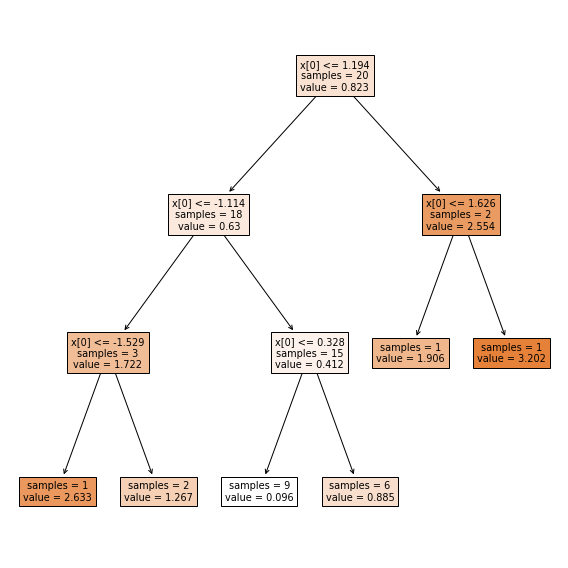

In [14]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X.reshape(-1,1), Y)
plt.figure(figsize=(8,8))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

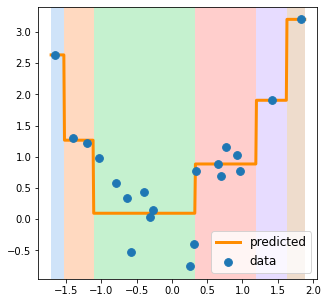

In [15]:
plot_reg_tree_decision(dt, X, Y)

### Same example with more data

Tree behaves a lot better with more training data

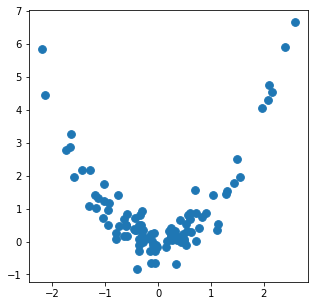

In [16]:
np.random.seed(111)
X = np.random.normal(0,1,100)
Y = X**2 + np.random.normal(0,0.4,100)

plt.figure(figsize=(5,5))
plt.scatter(X,Y,s=60)
plt.show()

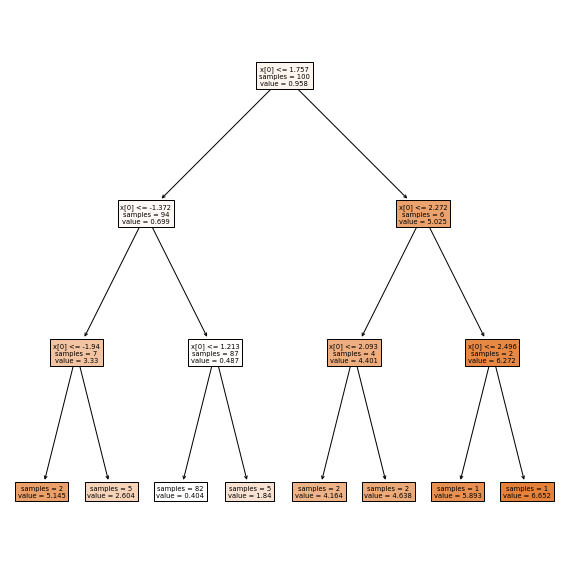

In [17]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X.reshape(-1,1), Y)
plt.figure(figsize=(8,8))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

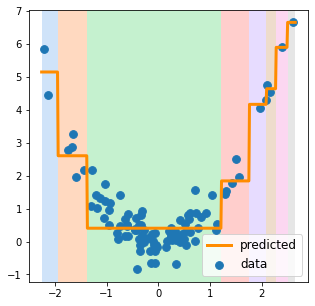

In [18]:
plot_reg_tree_decision(dt, X, Y, pred_in_front=True)

### Another example

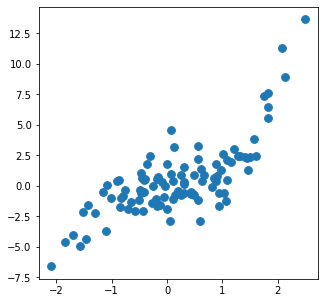

In [19]:
np.random.seed(999)
X = np.random.normal(0,1,100)
Y = X**3 + np.random.normal(0,1.5,100)

plt.figure(figsize=(5,5))
plt.scatter(X,Y,s=60)
plt.show()

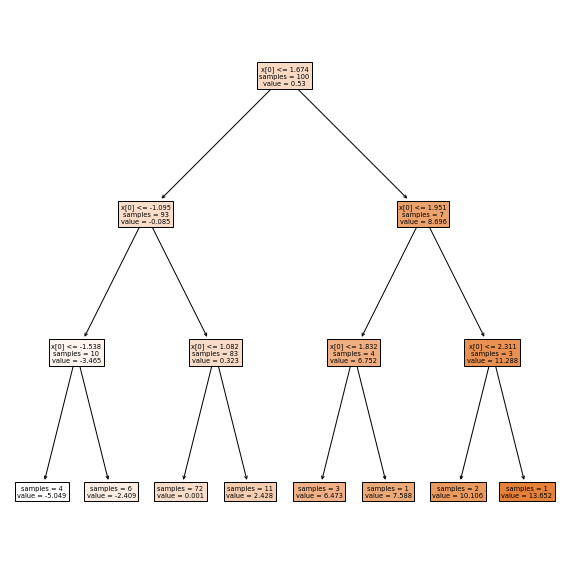

In [20]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X.reshape(-1,1), Y)
plt.figure(figsize=(8,8))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

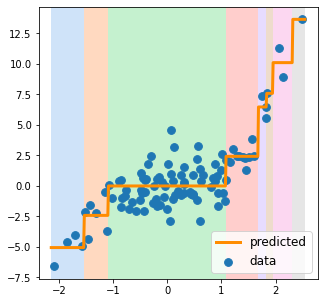

In [21]:
plot_reg_tree_decision(dt, X, Y, pred_in_front=True)

## Two-dimensional examples

### Simple example

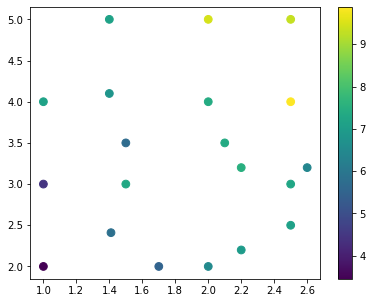

In [22]:
np.random.seed(132)
X = np.array([
    [1,2], [1.5,3], [2,2], [1.41,2.41], [1,3], [1,4], [1.4,4.1], [2.2,2.2], [1.5,3.5], [1.7,2],
    [2.2,3.2], [2,5], [2.5,2.5], [2.6,3.2], [2.1,3.5], [2.5,4], [1.4,5], [2,4], [2.5,3], [2.5,5]
])

Y = 2*X[:,0] + X[:,1] + np.random.normal(0,1,X.shape[0]) 

plt.figure(figsize=(6.5,5))
plt.scatter(X[:,0], X[:,1], c=Y, s=60)
plt.colorbar()
plt.show()

#### Fully-grown tree

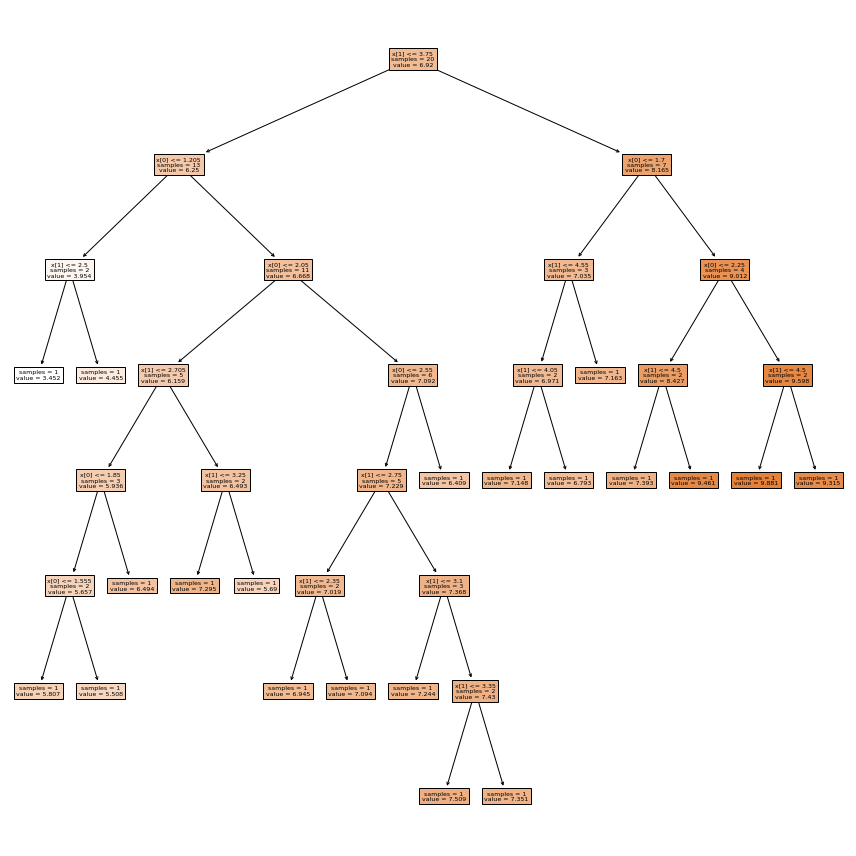

In [23]:
dt = DecisionTreeRegressor()
dt.fit(X, Y)
plt.figure(figsize=(12,12))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

#### Function to plot trees' predictions and splits for 2D data

In [24]:
def plot_2d_reg_tree_decision(tree, X, Y):
    x0_min, x0_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    x1_min, x1_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    x0_points, x1_points = np.meshgrid(np.linspace(x0_min, x0_max, 500), np.linspace(x1_min, x1_max, 500))
    yc = tree.predict(np.c_[x0_points.ravel(), x1_points.ravel()])
    yc = yc.reshape(x0_points.shape)
    plt.figure(figsize=(6.5,5))
    plt.scatter(X[:,0], X[:,1], c=Y, s=60, edgecolors='k', zorder=100)
    plt.contourf(x0_points, x1_points, yc, alpha=0.5, antialiased=True, zorder=10)
    plt.colorbar(label='predicted values')
    plt.show()

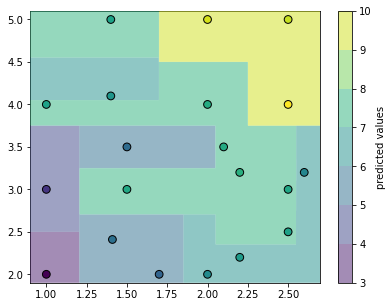

In [25]:
plot_2d_reg_tree_decision(dt, X, Y)

#### Tree with max_depth=3

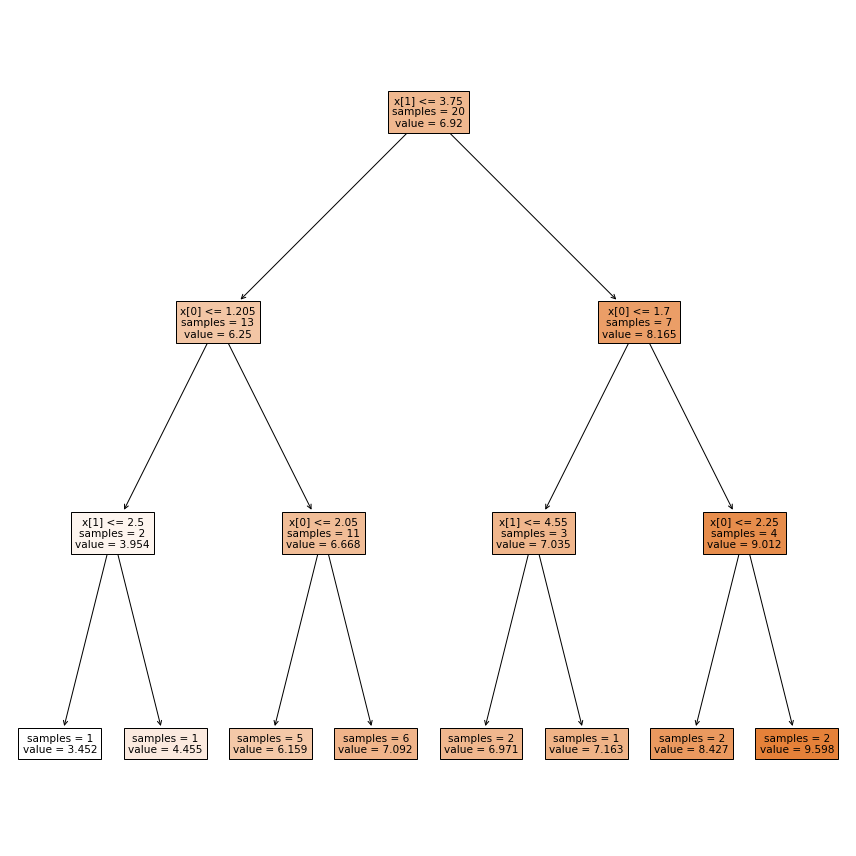

In [26]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X, Y)
plt.figure(figsize=(12,12))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show() 

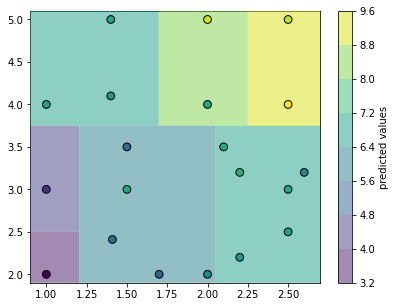

In [27]:
plot_2d_reg_tree_decision(dt, X, Y)

#### Similar example wth more data

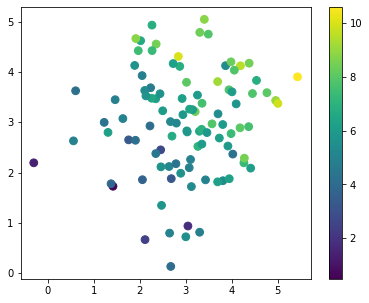

In [28]:
np.random.seed(444)

X = np.random.normal(2,1,[100,2]) + 1
Y = X[:,0] + X[:,1] + np.random.normal(0,1,100) 

plt.figure(figsize=(6.5,5))
plt.scatter(X[:,0], X[:,1], c=Y, s=60)
plt.colorbar()
plt.show()

#### Fully-grown tree

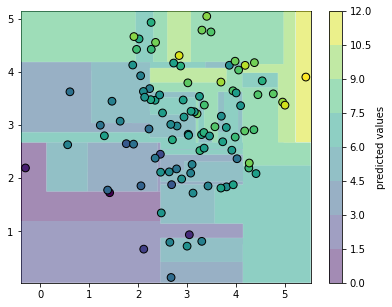

In [29]:
dt = DecisionTreeRegressor()
dt.fit(X, Y)
plot_2d_reg_tree_decision(dt, X, Y)

#### Tree with max_depth = 2

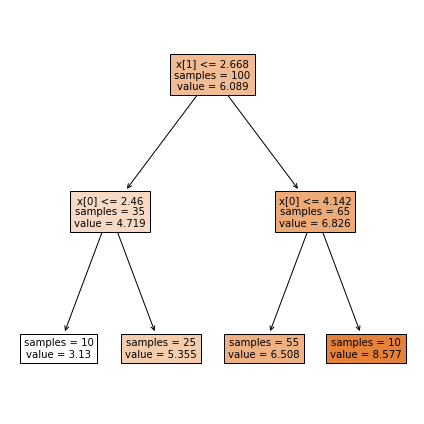

In [30]:
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X, Y)
plt.figure(figsize=(6,6))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

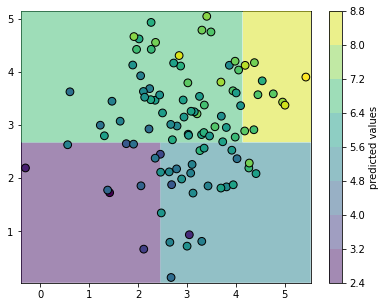

In [31]:
plot_2d_reg_tree_decision(dt, X, Y)

#### Tree with max_depth = 3 

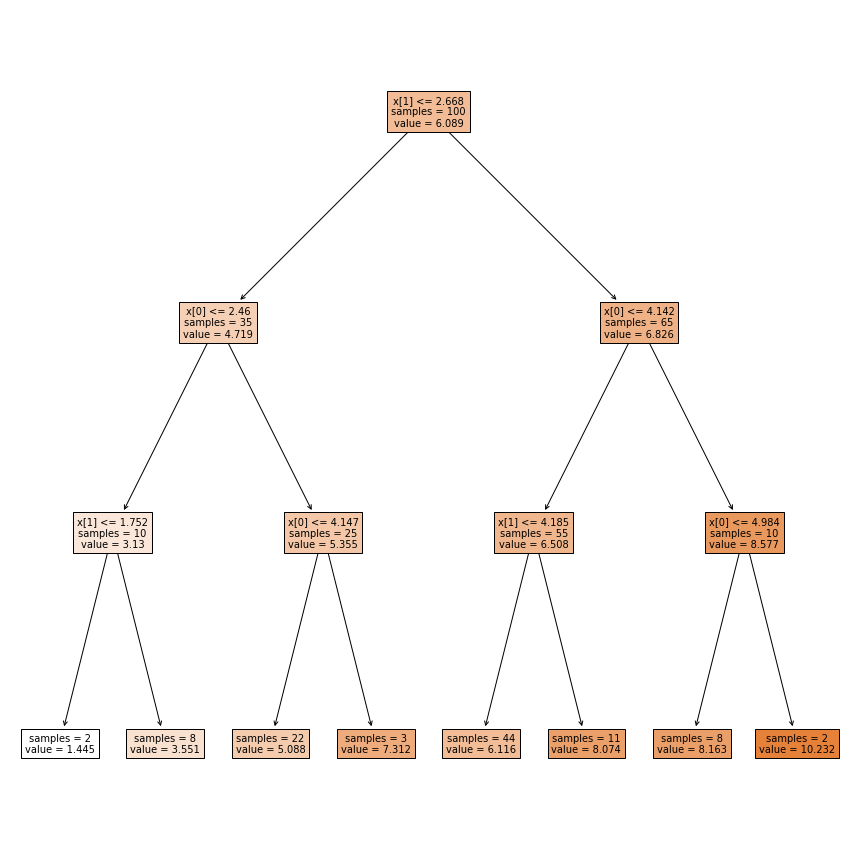

In [32]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X, Y)
plt.figure(figsize=(12,12))
plot_tree(dt, impurity=False, filled=True)
plt.tight_layout()
plt.show()

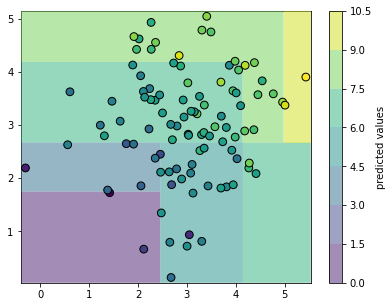

In [33]:
plot_2d_reg_tree_decision(dt, X, Y)